In [1]:
# -*-- coding: utf-8 -*-

from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [4]:
(x_train, _),(x_test,_)=mnist.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [6]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

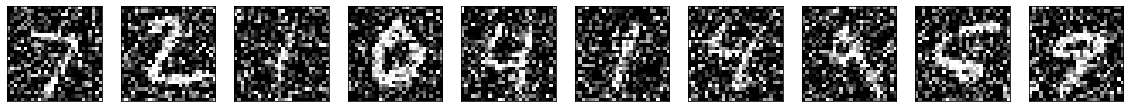

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, load_model

input_img = Input(shape=(28, 28, 1,))

In [15]:
x = Conv2D(32, (3, 3), padding='same', activation='relu')(input_img) # 28 * 28 * 32
x = MaxPooling2D((2, 2), padding='same')(x) # 14 * 14 * 32
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # 14 * 14 * 32
encoded = MaxPooling2D((2, 2), padding='same')(x) # 7 * 7 * 32

In [16]:
# 7 * 7 * 32
x = Conv2D(32, (3, 3), padding='same', activation='relu')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(x)

In [18]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [19]:
autoencoder.fit(x_train_noisy, x_train,
               epochs=100,
               batch_size=128,
               shuffle=True,
               validation_data=(x_test_noisy, x_test))

autoencoder.save('autoencoder.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 1024/60000 [..............................] - ETA: 1:29:24 - loss: 0.5345

KeyboardInterrupt: 

NameError: name 'xdecoded_img' is not defined

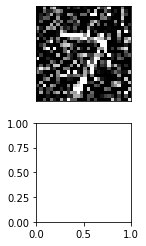

In [20]:
autoencoder = load_model('autoencoder.h5')
decoded_imgs=autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n , i + 1 + n)
    plt.imshow(xdecoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()